In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from tslearn.clustering import TimeSeriesKMeans
import shap

ImportError: Unable to import required dependencies:
numpy: No module named 'numpy'

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
csv_test = pd.read_csv('test.csv') #멜론 데이터 합본 사용

In [4]:
test = csv_test.drop(labels=['song','artist','album','genre','album_type','release'],axis=1)

In [5]:
test = test.fillna(0)

In [6]:
test

,Unnamed: 0,heart,chart_num,album_song_count,genre_count,heart_max,heart_min,heart_mean,heart_std,heart_25%,heart_75%,chart_num_high,chart_num_low,chart_in_count,chart_out_count
0,0,46599,35.0,6,1,46599,4413,16539.833333,16167.108765,5826.00,24187.25,137.0,86.000000,2,4
1,2,61583,288.0,2,2,61583,25214,43398.500000,18184.500000,34306.25,52490.75,288.0,288.000000,1,1
2,3,57898,742.0,2,1,57898,16306,37102.000000,20796.000000,26704.00,47500.00,742.0,742.000000,1,1
3,10,53117,3.0,6,3,53117,10738,23925.500000,14051.483750,14687.25,24859.75,234.0,100.000000,6,0
4,14,89111,170.0,8,2,89111,4343,28720.500000,30920.174151,4872.50,33045.50,243.0,206.500000,2,6
5,15,257850,159.0,1,1,257850,257850,257850.000000,0.000000,257850.00,257850.00,159.0,159.000000,1,0
6,16,156977,263.0,6,1,156977,19426,51953.500000,47479.667216,27306.75,39631.75,263.0,263.000000,1,5
7,18,105528,640.0,1,1,105528,105528,105528.000000,0.000000,105528.00,105528.00,640.0,640.000000,1,0
8,20,61980,0.0,1,1,61980,61980,61980.000000,0.000000,61980.00,61980.00,0.0,0.000000,0,1
9,28,41333,0.0,1,1,41333,41333,41333.000000,0.000000,41333.00,41333.00,0.0,0.000000,0,1


In [7]:
csv_test

,Unnamed: 0,song,artist,album,release,genre,heart,chart_num,album_type,album_song_count,genre_count,heart_max,heart_min,heart_mean,heart_std,heart_25%,heart_75%,chart_num_high,chart_num_low,chart_in_count,chart_out_count
0,0,Love Me Like This,NMIXX,expérgo,2023.03.20,댄스,46599,35.0,미니,6,1,46599,4413,16539.833333,16167.108765,5826.00,24187.25,137.0,86.000000,2,4
1,2,DICE,NMIXX,ENTWURF,2022.09.19,댄스,61583,288.0,싱글,2,2,61583,25214,43398.500000,18184.500000,34306.25,52490.75,288.0,288.000000,1,1
2,3,O.O,NMIXX,AD MARE,2022.02.22,댄스,57898,742.0,싱글,2,1,57898,16306,37102.000000,20796.000000,26704.00,47500.00,742.0,742.000000,1,1
3,10,Spicy,aespa,MY WORLD - The 3rd Mini Album,2023.05.08,댄스,53117,3.0,미니,6,3,53117,10738,23925.500000,14051.483750,14687.25,24859.75,234.0,100.000000,6,0
4,14,도깨비불 (Illusion),aespa,Girls - The 2nd Mini Album,2022.06.01,댄스,89111,170.0,미니,8,2,89111,4343,28720.500000,30920.174151,4872.50,33045.50,243.0,206.500000,2,6
5,15,Next Level,aespa,Next Level,2021.05.17,댄스,257850,159.0,싱글,1,1,257850,257850,257850.000000,0.000000,257850.00,257850.00,159.0,159.000000,1,0
6,16,Savage,aespa,Savage - The 1st Mini Album,2021.10.05,댄스,156977,263.0,미니,6,1,156977,19426,51953.500000,47479.667216,27306.75,39631.75,263.0,263.000000,1,5
7,18,Black Mamba,aespa,Black Mamba,2020.11.17,댄스,105528,640.0,싱글,1,1,105528,105528,105528.000000,0.000000,105528.00,105528.00,640.0,640.000000,1,0
8,20,Life′s Too Short (English Ver.),aespa,Life’s Too Short,2022.06.24,댄스,61980,NaN,싱글,1,1,61980,61980,61980.000000,0.000000,61980.00,61980.00,NaN,NaN,0,1
9,28,Forever (약속),aespa,Forever (약속),2021.02.05,발라드,41333,NaN,싱글,1,1,41333,41333,41333.000000,0.000000,41333.00,41333.00,NaN,NaN,0,1


In [8]:
pca = PCA(n_components = 2) #차원축소 진행

In [9]:
pca_transformed = pca.fit_transform(test)

In [10]:
pca_transformed

array([[ -74838.39577066,   14305.75005812],
       [ -22894.79073935,   35941.13207999],
       [ -35891.65285368,   28581.14576216],
       [ -60653.92514445,   17288.39470455],
       [ -23495.16642038,  -23259.73887487],
       [ 476788.49225627,  168787.23706994],
       [  68783.58766354,  -66587.57404105],
       [ 111466.12343722,   95934.31331108],
       [   7021.29665742,   75106.46271512],
       [ -42497.6647361 ,   65231.40149552],
       [  56749.0344915 ,  -43963.46413335],
       [ 427252.84965948,  158908.79447058],
       [ 195925.8567615 ,  -91352.24560086],
       [ 223507.28612548,  -14199.05954271],
       [ 286886.0310627 ,  -23059.07669278],
       [  93867.61295473,  -40131.99200458],
       [ 185344.58452116,   94977.38413848],
       [  51638.59282406,  -90881.40557621],
       [ 119654.37923544, -125739.28954138],
       [ -35778.39315404,  -34690.1588915 ],
       [-118152.52679014,   34811.24551923],
       [  52643.48075608,  -89945.91584484],
       [  

In [11]:
km = TimeSeriesKMeans(n_clusters=4, verbose=False, random_state=42, n_jobs=-1)

In [12]:
y_pred = km.fit_predict(pca_transformed) # 축소된 데이터를 통한 클러스터링

In [13]:
y_pred

array([0, 3, 3, 0, 3, 2, 1, 1, 3, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1,
       3, 3, 1, 1, 1, 0, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0,
       1, 3, 1, 1, 3, 1, 3, 0, 0, 0, 0, 3, 1, 3, 3, 0, 3, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
testdf = pd.DataFrame()
testdf['pca_x'] = pca_transformed[:, 0]
testdf['pca_y'] = pca_transformed[:, 1]
testdf['cluster'] = y_pred

In [15]:
testdf

,pca_x,pca_y,cluster
0,-74838.395771,14305.750058,0
1,-22894.790739,35941.132080,3
2,-35891.652854,28581.145762,3
3,-60653.925144,17288.394705,0
4,-23495.166420,-23259.738875,3
5,476788.492256,168787.237070,2
6,68783.587664,-66587.574041,1
7,111466.123437,95934.313311,1
8,7021.296657,75106.462715,3
9,-42497.664736,65231.401496,0


In [16]:
# 클러스터별 인덱스 추출
marker0 = testdf[testdf['cluster'] == 0].index
marker1 = testdf[testdf['cluster'] == 1].index
marker2 = testdf[testdf['cluster'] == 2].index
marker3 = testdf[testdf['cluster'] == 3].index

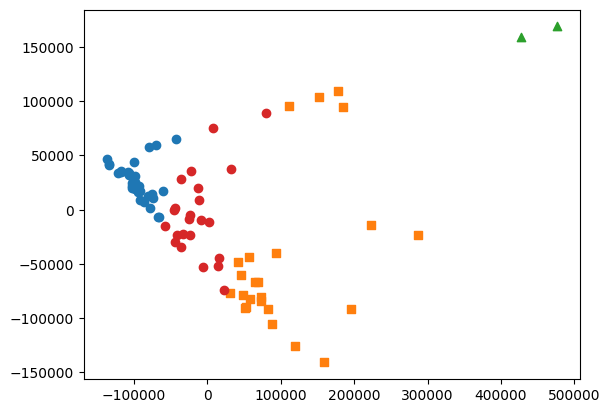

In [17]:
plt.scatter(x = testdf.loc[marker0, 'pca_x'], y = testdf.loc[marker0, 'pca_y'], marker = 'o')
plt.scatter(x = testdf.loc[marker1, 'pca_x'], y = testdf.loc[marker1, 'pca_y'], marker = 's')
plt.scatter(x = testdf.loc[marker2, 'pca_x'], y = testdf.loc[marker2, 'pca_y'], marker = '^')
plt.scatter(x = testdf.loc[marker3, 'pca_x'], y = testdf.loc[marker3, 'pca_y'], marker = 'o')

In [18]:
shap.initjs()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize

y=km.fit(pca_transformed).labels_
y = label_binarize(y, classes=[0,1,2,3])
clf=RandomForestClassifier()
clf.fit(test,y)

RandomForestClassifier()

In [20]:
from warnings import filterwarnings
import numpy as np
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

In [23]:
print(np.version)

<module 'numpy.version' from 'c:\\Python311\\Lib\\site-packages\\numpy\\version.py'>


In [21]:
import shap
explainer= shap.TreeExplainer(clf)
shap_values = explainer(test).values

In the future `np.bool` will be defined as the corresponding NumPy scalar.


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [19]:
explainer = shap.Explainer(km)
shap_values = explainer.shap_values(testdf)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: TimeSeriesKMeans(n_clusters=4, n_jobs=-1, random_state=42, verbose=False)

In [31]:
data_test= pd.DataFrame({'artist': csv_test['artist'],'data': y_pred,'heart':csv_test['heart']})

In [41]:
df_heart= pd.DataFrame({'artist': csv_test['artist'],'data': y_pred,'heart':csv_test['heart']})

In [42]:
df_heart

,artist,data,heart
0,NMIXX,0,46599
1,NMIXX,3,61583
2,NMIXX,3,57898
3,aespa,0,53117
4,aespa,3,89111
5,aespa,2,257850
6,aespa,1,156977
7,aespa,1,105528
8,aespa,3,61980
9,aespa,0,41333


<Axes: xlabel='data', ylabel='heart'>

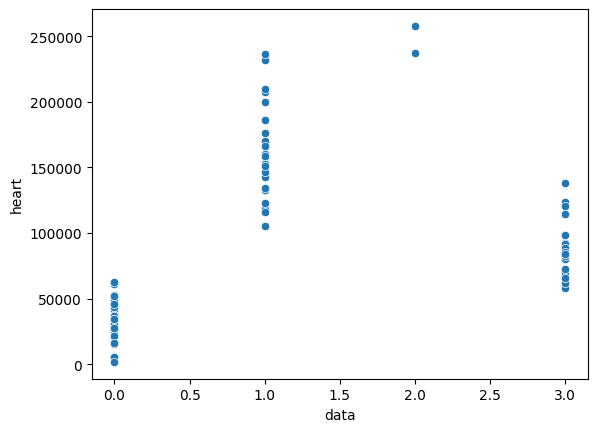

In [44]:
sns.scatterplot(x='data', y='heart', data=df_heart)

In [45]:
df_chart= pd.DataFrame({'artist': csv_test['artist'],'data': y_pred,'chart_num':csv_test['chart_num']})

In [46]:
df_chart

,artist,data,chart_num
0,NMIXX,0,35.0
1,NMIXX,3,288.0
2,NMIXX,3,742.0
3,aespa,0,3.0
4,aespa,3,170.0
5,aespa,2,159.0
6,aespa,1,263.0
7,aespa,1,640.0
8,aespa,3,NaN
9,aespa,0,NaN


<Axes: xlabel='data', ylabel='chart_num'>

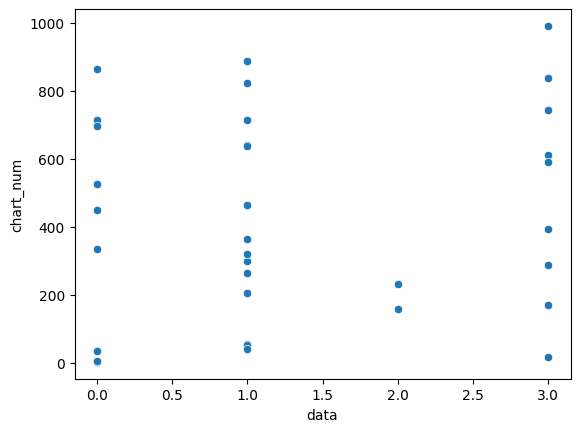

In [47]:
sns.scatterplot(x='data', y='chart_num', data=df_chart)